# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

In [4]:
import numpy as np
import pandas as pd

# Data visualization tools
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#computing and modeling tools
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.inspection import permutation_importance
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder,OrdinalEncoder,PolynomialFeatures,LabelEncoder,MinMaxScaler
from sklearn.compose import ColumnTransformer,make_column_selector,make_column_transformer, TransformedTargetRegressor
from sklearn.feature_selection import SequentialFeatureSelector, RFE
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.decomposition import PCA,FastICA
from sklearn import set_config
set_config(display="diagram")
from sklearn.utils import shuffle

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

In [6]:
# The data:

df=pd.read_csv('C:/Users/hande/Downloads/vehicles.csv')

In [7]:
df.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

# Data collecting, describing, exploring, and verfying data quality

In [8]:
df.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [9]:
df.shape

(426880, 18)

In [10]:

type(df)

pandas.core.frame.DataFrame

In [11]:
df.index

RangeIndex(start=0, stop=426880, step=1)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [13]:
df.describe()

,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


In [14]:

# Getting the unique types of transmission
df['transmission'].unique()

array([nan, 'other', 'automatic', 'manual'], dtype=object)

In [15]:
# Identifying transmission of used cars
df['transmission'].value_counts()

automatic    336524
other         62682
manual        25118
Name: transmission, dtype: int64

In [16]:

# Identifying drive cars
df['drive'].value_counts()

4wd    131904
fwd    105517
rwd     58892
Name: drive, dtype: int64

In [17]:

# Getting the unique types of clyinders
df['cylinders'].unique()

array([nan, '8 cylinders', '6 cylinders', '4 cylinders', '5 cylinders',
       'other', '3 cylinders', '10 cylinders', '12 cylinders'],
      dtype=object)

In [18]:


# Identifying the cylinders of the used cars 
df['cylinders'].value_counts()

6 cylinders     94169
4 cylinders     77642
8 cylinders     72062
5 cylinders      1712
10 cylinders     1455
other            1298
3 cylinders       655
12 cylinders      209
Name: cylinders, dtype: int64

In [19]:

# Getting the unique types of condtion
df['condition'].unique()

array([nan, 'good', 'excellent', 'fair', 'like new', 'new', 'salvage'],
      dtype=object)

In [20]:

# Identifying the condition of the used cars 
df['condition'].value_counts()

good         121456
excellent    101467
like new      21178
fair           6769
new            1305
salvage         601
Name: condition, dtype: int64

In [21]:


# Getting the unique types of type
df['type'].unique()

array([nan, 'pickup', 'truck', 'other', 'coupe', 'SUV', 'hatchback',
       'mini-van', 'sedan', 'offroad', 'bus', 'van', 'convertible',
       'wagon'], dtype=object)

In [22]:

# Getting the unique types of paint color
df['paint_color'].unique()

array([nan, 'white', 'blue', 'red', 'black', 'silver', 'grey', 'brown',
       'yellow', 'orange', 'green', 'custom', 'purple'], dtype=object)

In [24]:

# checking the quality of the data
df.isnull().sum()

id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64

In [26]:
# All missing values greater than 0
for i in df.columns:
    if df[i].isnull().sum()>0:
        print(i,'missing a data {values_gt0:.2f}%'.format(values_gt0=df[i].isnull().sum()/df.shape[0]*100))

year missing a data 0.28%
manufacturer missing a data 4.13%
model missing a data 1.24%
condition missing a data 40.79%
cylinders missing a data 41.62%
fuel missing a data 0.71%
odometer missing a data 1.03%
title_status missing a data 1.93%
transmission missing a data 0.60%
VIN missing a data 37.73%
drive missing a data 30.59%
size missing a data 71.77%
type missing a data 21.75%
paint_color missing a data 30.50%


### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [28]:

# Before filling and removing the missing values, it is good to have a copy of the orginal data set
df_copy=df.copy()

# Numerica Data Cleaning:

In [29]:

# Upper percentile and lower percentile based on price cars
price_1 =df_copy ['price'].quantile(0.999) 
price_2 =df_copy['price'].quantile(0.1)
print(f'upper percentile based on the used cars price is:{price_1}')
print(f'lower percentile based on the used cars price is:{price_2}')

upper percentile based on the used cars price is:120000.0
lower percentile based on the used cars price is:500.0


In [30]:

# Upper percentile and lower percentile based on odometer
year_1 =df_copy['year'].quantile(0.999) 
year_2 =df_copy['year'].quantile(0.)
print(f'upper percentile based on the used cars year is:{year_1}')
print(f'lower percentile based on the used cars year is:{year_2}')

upper percentile based on the used cars year is:2021.0
lower percentile based on the used cars year is:1900.0


In [31]:

# Upper percentile and lower percentile based on odometer
odometer_1 =df_copy['odometer'].quantile(0.99) 
odometer_2 =df_copy['odometer'].quantile(0.05)
print(f'upper percentile based on the used cars odometer is:{odometer_1}')
print(f'lower percentile based on the used cars odometer is:{odometer_2}')

upper percentile based on the used cars odometer is:280000.0
lower percentile based on the used cars odometer is:6318.0


In [32]:
# Taking a range based on upper and lower percentile price and odometer cars
df_data = df_copy[(df_copy['price'] < price_1) & (df_copy['price'] > price_2)]
df_data = df_copy[(df_copy['year'] < year_1) & (df_copy['year'] > year_2)]
df_data= df_copy[(df_copy['odometer'] < odometer_1) & (df_copy['odometer'] > odometer_2)]

# Categorical Data Cleaning:

In [33]:
# Selecting features that has  20 and above percent missing values
columns=[]
for column in df_data.columns:
    if df_data[column].isnull().sum()/df_data.shape[0]*100>20:
        columns.append(column)
    else:
        pass
print(columns)

['condition', 'cylinders', 'VIN', 'drive', 'size', 'type', 'paint_color']


In [35]:
# To add and drop the missing data


pd.options.display.max_columns=None
     

In [36]:

vehicles_df=df_data.drop(['id','VIN','size'], axis=1)
vehicles_df

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state
27,auburn,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,clean,other,NaN,pickup,white,al
28,auburn,22590,2010.0,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,clean,other,NaN,pickup,blue,al
29,auburn,39590,2020.0,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,clean,other,NaN,pickup,red,al
30,auburn,30990,2017.0,toyota,tundra double cab sr,good,8 cylinders,gas,41124.0,clean,other,NaN,pickup,red,al
31,auburn,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,truck,black,al
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426874,wyoming,33590,2018.0,lexus,gs 350 sedan 4d,good,6 cylinders,gas,30814.0,clean,automatic,rwd,sedan,white,wy
426875,wyoming,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,fwd,sedan,NaN,wy
426876,wyoming,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,fwd,sedan,red,wy
426878,wyoming,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,fwd,sedan,silver,wy


In [37]:

vehicles_df.drop('region',inplace=True, axis=1)
vehicles_df.head()

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state
27,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,clean,other,NaN,pickup,white,al
28,22590,2010.0,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,clean,other,NaN,pickup,blue,al
29,39590,2020.0,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,clean,other,NaN,pickup,red,al
30,30990,2017.0,toyota,tundra double cab sr,good,8 cylinders,gas,41124.0,clean,other,NaN,pickup,red,al
31,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,truck,black,al


# Filling and droping the missing values using fillna and dropna functions:

In [38]:

vehicles_df.dropna(inplace=True)
vehicles_df.shape

(111214, 14)

* At the beginning, our dataset has 426880 data points, after dropped the missing values using the dropna method, it has 115988 data points.

In [39]:

vehicles_df.head()

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state
31,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,truck,black,al
32,27990,2012.0,gmc,sierra 2500 hd extended cab,good,8 cylinders,gas,68696.0,clean,other,4wd,pickup,black,al
33,34590,2016.0,chevrolet,silverado 1500 double,good,6 cylinders,gas,29499.0,clean,other,4wd,pickup,silver,al
34,35000,2019.0,toyota,tacoma,excellent,6 cylinders,gas,43000.0,clean,automatic,4wd,truck,grey,al
35,29990,2016.0,chevrolet,colorado extended cab,good,6 cylinders,gas,17302.0,clean,other,4wd,pickup,red,al


In [40]:

# To control if there is any missing values


vehicles_df.isnull().sum()

price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
type            0
paint_color     0
state           0
dtype: int64

In [41]:

# Unique values of the model
vehicles_df['model'].unique()
     

array(['f-150 xlt', 'sierra 2500 hd extended cab',
       'silverado 1500 double', ..., 'cj 3a willys', 'rx& gls sport',
       'gand wagoneer'], dtype=object)

In [42]:

vehicles_df['model'].value_counts().head(5)

f-150             1807
silverado 1500    1588
1500              1004
camry              892
accord             803
Name: model, dtype: int64

In [43]:

vehicles_df['model'].value_counts().tail(5)

town country limited    1
f-150 fx4 4x4           1
m-class 3.5l            1
glk 350 awd             1
gand wagoneer           1
Name: model, dtype: int64

In [44]:
# Barplots to see by states
print('The number of the sates: \n=========','\n',vehicles_df['state'].unique())
print('in')
print('The total number of the sates: \n=========','\n',vehicles_df['state'].nunique())

The number of the sates: 
 ['al' 'ak' 'az' 'ar' 'ca' 'co' 'ct' 'dc' 'de' 'fl' 'ga' 'hi' 'id' 'il'
 'in' 'ia' 'ks' 'ky' 'la' 'me' 'md' 'ma' 'mi' 'mn' 'ms' 'mo' 'mt' 'nc'
 'ne' 'nv' 'nj' 'nm' 'ny' 'nh' 'nd' 'oh' 'ok' 'or' 'pa' 'ri' 'sc' 'sd'
 'tn' 'tx' 'ut' 'vt' 'va' 'wa' 'wv' 'wi' 'wy']
in
The total number of the sates: 
 51


# Only California Dataset 

In [45]:

# Total number of used cars sold in california
vehicles_cal=vehicles_df[vehicles_df['state']=='ca']
vehicles_cal

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state
21174,11975,2003.0,harley-davidson,davidson,excellent,8 cylinders,gas,207000.0,clean,automatic,rwd,pickup,black,ca
21176,21950,2003.0,chevrolet,silverado 3500,excellent,8 cylinders,diesel,202537.0,clean,automatic,4wd,truck,grey,ca
21178,27590,2018.0,acura,tlx 3.5 sedan 4d,good,6 cylinders,gas,20420.0,clean,other,fwd,sedan,black,ca
21185,3975,2006.0,pontiac,g6,excellent,4 cylinders,gas,187000.0,clean,automatic,fwd,sedan,silver,ca
21187,32500,1987.0,volkswagen,vanagon,excellent,4 cylinders,gas,177313.0,clean,automatic,rwd,mini-van,blue,ca
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71763,16590,2014.0,acura,rdx sport utility 4d,good,6 cylinders,gas,86919.0,clean,automatic,fwd,SUV,black,ca
71764,41990,2019.0,lincoln,continental reserve,good,6 cylinders,gas,9345.0,clean,other,fwd,sedan,blue,ca
71766,17590,2015.0,acura,rdx sport utility 4d,good,6 cylinders,gas,80556.0,clean,automatic,fwd,SUV,brown,ca
71771,6250,2006.0,bmw,325i,like new,6 cylinders,gas,140000.0,clean,automatic,rwd,sedan,silver,ca


Text(0, 0.5, 'Count of Cars')

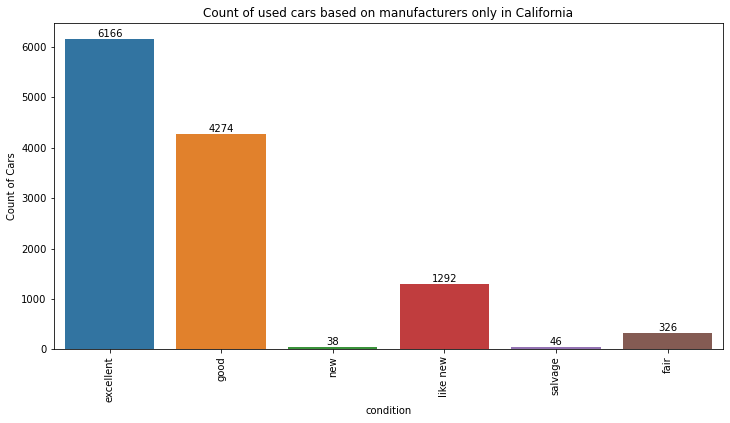

In [48]:

plt.figure(figsize = (12, 6))
plot = sns.countplot(x ='condition', data=vehicles_cal)
plt.xticks(rotation = 90)
for p in plot.patches:
    plot.annotate(p.get_height(), 
                        (p.get_x() + p.get_width() / 2.0, 
                         p.get_height()), 
                        ha = 'center', 
                        va = 'center', 
                        xytext = (0, 5),
                        textcoords = 'offset points')

plt.title("Count of used cars based on manufacturers only in California")
plt.xlabel("condition")
plt.ylabel("Count of Cars")

Text(0, 0.5, 'Count of cars')

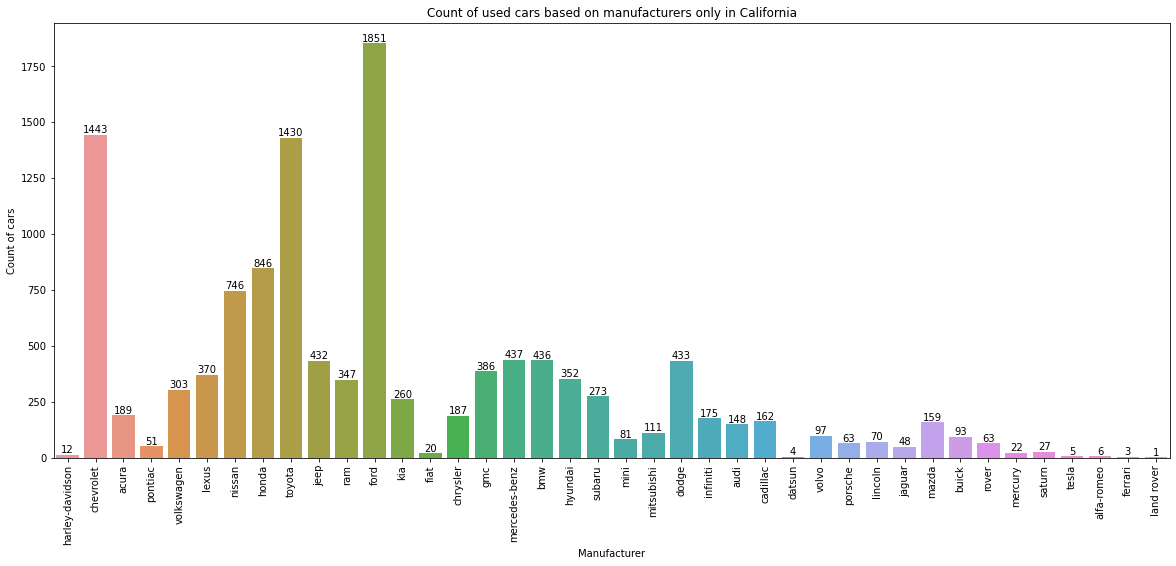

In [49]:

plt.figure(figsize = (20, 8))
plot = sns.countplot(x ='manufacturer', data=vehicles_cal)
plt.xticks(rotation = 90)
for p in plot.patches:
    plot.annotate(p.get_height(), 
                        (p.get_x() + p.get_width() / 2.0, 
                         p.get_height()), 
                        ha = 'center', 
                        va = 'center', 
                        xytext = (0, 5),
                        textcoords = 'offset points')

plt.title("Count of used cars based on manufacturers only in California")
plt.xlabel("Manufacturer")
plt.ylabel("Count of cars")

Text(0, 0.5, 'Count of cars')

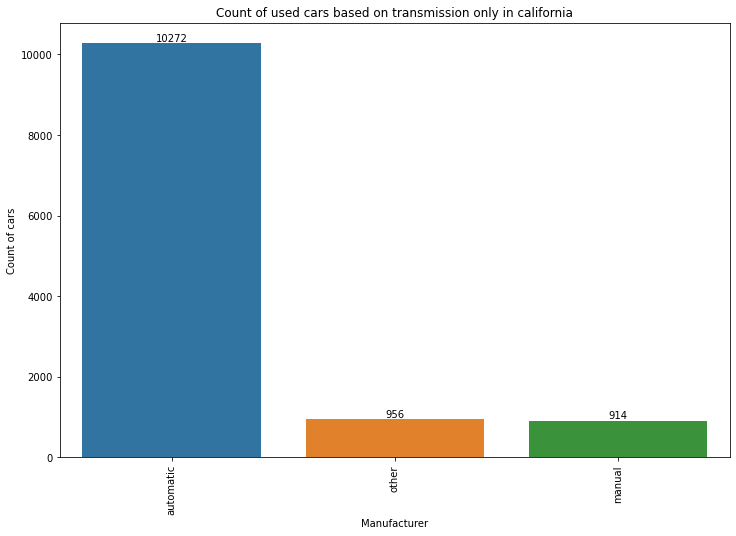

In [50]:

plt.figure(figsize = (12, 8))
plot = sns.countplot(x ='transmission', data=vehicles_cal)
plt.xticks(rotation = 90)
for p in plot.patches:
    plot.annotate(p.get_height(), 
                        (p.get_x() + p.get_width() / 2.0, 
                         p.get_height()), 
                        ha = 'center', 
                        va = 'center', 
                        xytext = (0, 5),
                        textcoords = 'offset points')

plt.title("Count of used cars based on transmission only in california")
plt.xlabel("Manufacturer")
plt.ylabel("Count of cars")

In [51]:
# when we sorted by prices:
vehicles_cal.sort_values(by='price',ascending=False)

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state
29386,1111111111,1999.0,ford,f350 super duty lariat,good,8 cylinders,diesel,149000.0,clean,automatic,rwd,pickup,white,ca
68935,2000000,2002.0,saturn,l-series l200 4dr sedan,good,4 cylinders,gas,164290.0,clean,automatic,fwd,sedan,green,ca
41657,150000,1959.0,jaguar,xk 150,excellent,6 cylinders,gas,64765.0,clean,manual,rwd,convertible,white,ca
63153,150000,1959.0,jaguar,xk 150 se dhc,excellent,6 cylinders,gas,64765.0,clean,manual,rwd,convertible,white,ca
42896,129800,2017.0,rover,autobiography,like new,8 cylinders,gas,49982.0,clean,automatic,4wd,SUV,grey,ca
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69182,0,2017.0,honda,pilot ex-l,excellent,6 cylinders,gas,49482.0,clean,automatic,fwd,SUV,white,ca
69184,0,2017.0,kia,optima 4dr sdn lx,excellent,4 cylinders,gas,66415.0,clean,automatic,fwd,sedan,grey,ca
49333,0,2013.0,toyota,highlander,excellent,6 cylinders,gas,127396.0,clean,automatic,4wd,SUV,black,ca
49339,0,2019.0,jeep,wrangler sport,like new,6 cylinders,gas,22436.0,clean,manual,4wd,SUV,silver,ca


In [53]:
# Grouping the California dataset by manufacturers:
v_gr_by_manu= vehicles_cal.groupby('manufacturer').sum()[['price']]
v_gr_by_manu.head()

C:\Users\hande\AppData\Local\Temp\ipykernel_12784\3605802955.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  v_gr_by_manu= vehicles_cal.groupby('manufacturer').sum()[['price']]


,price
manufacturer,
acura,2660242
alfa-romeo,152392
audi,2027499
bmw,6144335
buick,975071


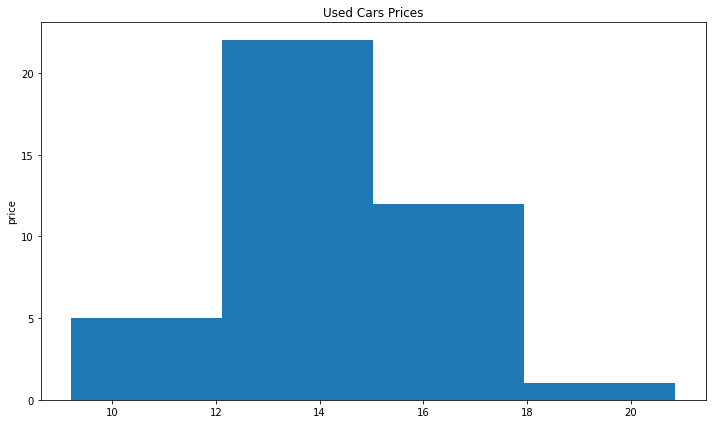

In [54]:
# Drawing histogram for the price in California State:

plt.figure(figsize=(10,6))
plt.hist(np.log(v_gr_by_manu['price']), bins=4) 
plt.ylabel('price')
plt.title('Used Cars Prices')
plt.tight_layout()
plt.show()
     

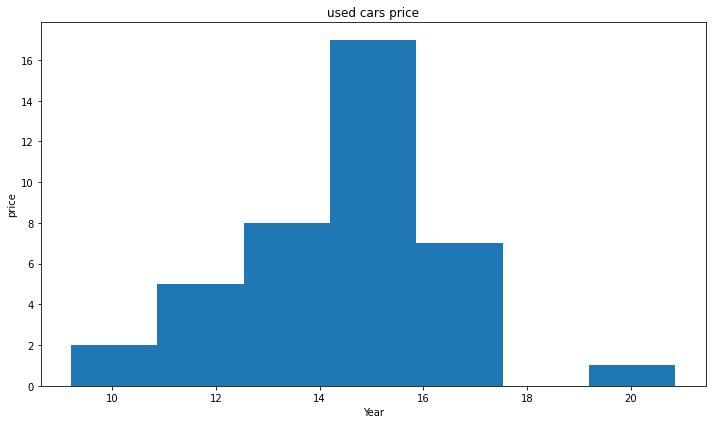

In [55]:
# Drawing a histogram for the price in California State when grouped by years:

plt.figure(figsize=(10,6))
plt.hist(np.log(v_gr_by_manu['price']), bins=7) 
plt.ylabel('price')
plt.xlabel('Year')
plt.title('used cars price')
plt.tight_layout()
plt.show()
     

In [57]:
# Grouping the California dataset by years:
year_sorted =vehicles_df.groupby('year').sum()[['price']].sort_values(by='price', ascending =False)
year_sorted.head()

C:\Users\hande\AppData\Local\Temp\ipykernel_12784\1280291127.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  year_sorted =vehicles_df.groupby('year').sum()[['price']].sort_values(by='price', ascending =False)


,price
year,
2007.0,3797658753
1999.0,1241585760
2008.0,187001367
2017.0,183224184
2018.0,164806752


* 2007 has highest number of sold used cars and 2018 has the lowest number.

In [58]:
# Grouping the entire dataset by states:
state=vehicles_df.groupby('state').sum()[['price']]
state.head()

C:\Users\hande\AppData\Local\Temp\ipykernel_12784\2261436736.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  state=vehicles_df.groupby('state').sum()[['price']]


,price
state,
ak,21242161
al,23208096
ar,13118251
az,33799071
ca,1297560077


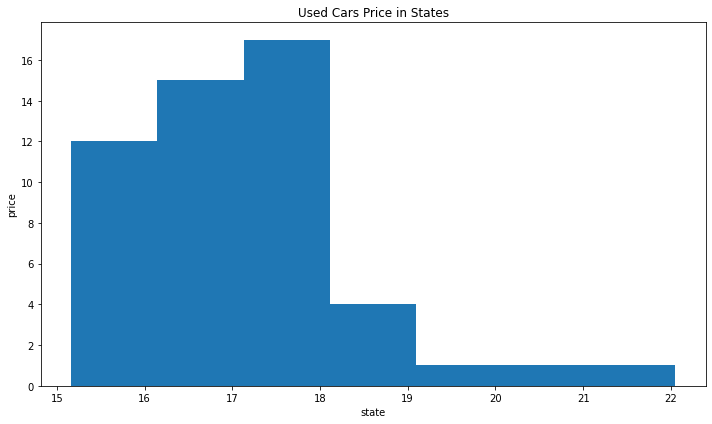

In [59]:
# Drawing a histogram for the price of the entire dataset:
plt.figure(figsize=(10,6))
plt.hist(np.log(state['price']), bins=7) 
plt.ylabel('price')
plt.xlabel('state')
plt.title('Used Cars Price in States')
plt.tight_layout()
plt.show()

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

# Data Preprocessing

# Splitting the data set into numberical and categorical data set

In [ ]:
vehicles_df

In [61]:

# Numberical dataset:
n_data=vehicles_df[['price','year','odometer']]
n_data.head()
     

,price,year,odometer
31,15000,2013.0,128000.0
32,27990,2012.0,68696.0
33,34590,2016.0,29499.0
34,35000,2019.0,43000.0
35,29990,2016.0,17302.0


In [62]:
# Categorical dataset
c_data= vehicles_df.drop(['price','year','model','odometer'], axis=1)
c_data.head()

,manufacturer,condition,cylinders,fuel,title_status,transmission,drive,type,paint_color,state
31,ford,excellent,6 cylinders,gas,clean,automatic,rwd,truck,black,al
32,gmc,good,8 cylinders,gas,clean,other,4wd,pickup,black,al
33,chevrolet,good,6 cylinders,gas,clean,other,4wd,pickup,silver,al
34,toyota,excellent,6 cylinders,gas,clean,automatic,4wd,truck,grey,al
35,chevrolet,good,6 cylinders,gas,clean,other,4wd,pickup,red,al


In [64]:
#dummies the categorical features
man_dummies=pd.get_dummies(c_data['manufacturer'])
con_dummies=pd.get_dummies(c_data['condition'])
cyl_dummies=pd.get_dummies(c_data['cylinders'])
fuel_dummies=pd.get_dummies(c_data['fuel'])
title_dummies=pd.get_dummies(c_data['title_status'])
tran_dummies=pd.get_dummies(c_data['transmission'])
drive_dummies=pd.get_dummies(c_data['drive'])
type_dummies=pd.get_dummies(c_data['type'])
paint_dummies=pd.get_dummies(c_data['paint_color'])
sate_dummies=pd.get_dummies(c_data['state'])

In [65]:
# concat all the dummies
c_dummies=pd.concat([man_dummies,con_dummies,cyl_dummies,fuel_dummies,title_dummies,tran_dummies,drive_dummies,type_dummies,paint_dummies,sate_dummies], axis=1)
c_dummies.head()

,acura,alfa-romeo,aston-martin,audi,bmw,buick,cadillac,chevrolet,chrysler,datsun,dodge,ferrari,fiat,ford,gmc,harley-davidson,honda,hyundai,infiniti,jaguar,jeep,kia,land rover,lexus,lincoln,mazda,mercedes-benz,mercury,mini,mitsubishi,nissan,pontiac,porsche,ram,rover,saturn,subaru,tesla,toyota,volkswagen,volvo,excellent,fair,good,like new,new,salvage,10 cylinders,12 cylinders,3 cylinders,4 cylinders,5 cylinders,6 cylinders,8 cylinders,other,diesel,electric,gas,hybrid,other,clean,lien,missing,parts only,rebuilt,salvage,automatic,manual,other,4wd,fwd,rwd,SUV,bus,convertible,coupe,hatchback,mini-van,offroad,other,pickup,sedan,truck,van,wagon,black,blue,brown,custom,green,grey,orange,purple,red,silver,white,yellow,ak,al,ar,az,ca,co,ct,dc,de,fl,ga,hi,ia,id,il,in,ks,ky,la,ma,md,me,mi,mn,mo,ms,mt,nc,nd,ne,nh,nj,nm,nv,ny,oh,ok,or,pa,ri,sc,sd,tn,tx,ut,va,vt,wa,wi,wv,wy
31,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
32,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
33,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
34,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
35,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [66]:
# DataFrame after concate the standarized numerical dataframe to the dummies
num_cat_data=pd.concat([n_data,c_dummies], axis=1)
num_cat_data.head()

,price,year,odometer,acura,alfa-romeo,aston-martin,audi,bmw,buick,cadillac,chevrolet,chrysler,datsun,dodge,ferrari,fiat,ford,gmc,harley-davidson,honda,hyundai,infiniti,jaguar,jeep,kia,land rover,lexus,lincoln,mazda,mercedes-benz,mercury,mini,mitsubishi,nissan,pontiac,porsche,ram,rover,saturn,subaru,tesla,toyota,volkswagen,volvo,excellent,fair,good,like new,new,salvage,10 cylinders,12 cylinders,3 cylinders,4 cylinders,5 cylinders,6 cylinders,8 cylinders,other,diesel,electric,gas,hybrid,other,clean,lien,missing,parts only,rebuilt,salvage,automatic,manual,other,4wd,fwd,rwd,SUV,bus,convertible,coupe,hatchback,mini-van,offroad,other,pickup,sedan,truck,van,wagon,black,blue,brown,custom,green,grey,orange,purple,red,silver,white,yellow,ak,al,ar,az,ca,co,ct,dc,de,fl,ga,hi,ia,id,il,in,ks,ky,la,ma,md,me,mi,mn,mo,ms,mt,nc,nd,ne,nh,nj,nm,nv,ny,oh,ok,or,pa,ri,sc,sd,tn,tx,ut,va,vt,wa,wi,wv,wy
31,15000,2013.0,128000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
32,27990,2012.0,68696.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
33,34590,2016.0,29499.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
34,35000,2019.0,43000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
35,29990,2016.0,17302.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [67]:

# standarize the numerical values
scaler=StandardScaler()
num_cat_scaled=scaler.fit_transform(num_cat_data)
num_cat_scaled_df=pd.DataFrame(num_cat_scaled,index=num_cat_data.index, columns=num_cat_data.columns)
num_cat_scaled_df

,price,year,odometer,acura,alfa-romeo,aston-martin,audi,bmw,buick,cadillac,chevrolet,chrysler,datsun,dodge,ferrari,fiat,ford,gmc,harley-davidson,honda,hyundai,infiniti,jaguar,jeep,kia,land rover,lexus,lincoln,mazda,mercedes-benz,mercury,mini,mitsubishi,nissan,pontiac,porsche,ram,rover,saturn,subaru,tesla,toyota,volkswagen,volvo,excellent,fair,good,like new,new,salvage,10 cylinders,12 cylinders,3 cylinders,4 cylinders,5 cylinders,6 cylinders,8 cylinders,other,diesel,electric,gas,hybrid,other,clean,lien,missing,parts only,rebuilt,salvage,automatic,manual,other,4wd,fwd,rwd,SUV,bus,convertible,coupe,hatchback,mini-van,offroad,other,pickup,sedan,truck,van,wagon,black,blue,brown,custom,green,grey,orange,purple,red,silver,white,yellow,ak,al,ar,az,ca,co,ct,dc,de,fl,ga,hi,ia,id,il,in,ks,ky,la,ma,md,me,mi,mn,mo,ms,mt,nc,nd,ne,nh,nj,nm,nv,ny,oh,ok,or,pa,ri,sc,sd,tn,tx,ut,va,vt,wa,wi,wv,wy
31,-0.003949,0.369468,0.357588,-0.10422,-0.019894,-0.006705,-0.107048,-0.170843,-0.116452,-0.123170,-0.424414,-0.133974,-0.013411,-0.188932,-0.013411,-0.03878,2.161919,-0.209734,-0.015292,-0.248025,-0.152912,-0.113156,-0.058244,-0.229227,-0.134979,-0.008482,-0.140902,-0.100132,-0.109134,-0.162115,-0.066251,-0.067135,-0.088588,-0.239559,-0.089563,-0.056268,-0.192678,-0.061201,-0.061422,-0.156839,-0.019667,-0.30861,-0.143958,-0.084798,1.086290,-0.177314,-0.813096,-0.346235,-0.058476,-0.048594,-0.087604,-0.021835,-0.041802,-0.674844,-0.090426,1.292265,-0.642353,-0.05015,-0.238508,-0.040819,0.301639,-0.107947,-0.129093,0.235716,-0.086503,-0.039357,-0.019667,-0.178497,-0.11205,0.451049,-0.271098,-0.334425,-0.861691,-0.727503,1.841171,-0.560935,-0.036627,-0.171817,-0.265378,-0.19994,-0.1556,-0.063526,-0.170955,-0.351488,-0.609943,2.547383,-0.173995,-0.164466,2.071015,-0.34877,-0.173171,-0.149301,-0.178792,-0.349078,-0.07334,-0.054054,-0.348607,-0.415391,-0.562722,-0.08802,-0.087968,9.503089,-0.092821,-0.14067,-0.350082,-0.147083,-0.119894,-0.081788,-0.055864,-0.275241,-0.118224,-0.071775,-0.161295,-0.124963,-0.15282,-0.137003,-0.132822,-0.115016,-0.077029,-0.157919,-0.096163,-0.085548,-0.198916,-0.153649,-0.106186,-0.054471,-0.100177,-0.196115,-0.044924,-0.05397,-0.084583,-0.15997,-0.102352,-0.080157,-0.244781,-0.223542,-0.13987,-0.162902,-0.195199,-0.083661,-0.124443,-0.058862,-0.156537,-0.225905,-0.050954,-0.163743,-0.112132,-0.114694,-0.184236,-0.047939,-0.040487
32,-0.002839,0.256683,-0.647929,-0.10422,-0.019894,-0.006705,-0.107048,-0.170843,-0.116452,-0.123170,-0.424414,-0.133974,-0.013411,-0.188932,-0.013411,-0.03878,-0.462552,4.767940,-0.015292,-0.248025,-0.152912,-0.113156,-0.058244,-0.229227,-0.134979,-0.008482,-0.140902,-0.100132,-0.109134,-0.162115,-0.066251,-0.067135,-0.088588,-0.239559,-0.089563,-0.056268,-0.192678,-0.061201,-0.061422,-0.156839,-0.019667,-0.30861,-0.143958,-0.084798,-0.920565,-0.177314,1.229867,-0.346235,-0.058476,-0.048594,-0.087604,-0.021835,-0.041802,-0.674844,-0.090426,-0.773835,1.556775,-0.05015,-0.238508,-0.040819,0.301639,-0.107947,-0.129093,0.235716,-0.086503,-0.039357,-0.019667,-0.178497,-0.11205,-2.217053,-0.271098,2.990211,1.160509,-0.727503,-0.543133,-0.560935,-0.036627,-0.171817,-0.265378,-0.19994,-0.1556,-0.063526,-0.170955,2.845046,-0.609943,-0.392560,-0.173995,-0.164466,2.071015,-0.34877,-0.173171,-0.149301,-0.178792,-0.349078,-0.07334,-0.054054,-0.348607,-0.415391,-0.562722,-0.08802,-0.087968,9.503089,-0.092821,-0.14067,-0.350082,-0.147083,-0.119894,-0.081788,-0.055864,-0.275241,-0.118224,-0.071775,-0.161295,-0.124963,-0.15282,-0.137003,-0.132822,-0.115016,-0.077029,-0.157919,-0.096163,-0.085548,-0.198916,-0.153649,-0.106186,-0.054471,-0.100177,-0.196115,-0.044924,-0.05397,-0.084583,-0.15997,-0.102352,-0.080157,-0.244781,-0.223542,-0.13987,-0.162902,-0.195199,-0.083661,-0.124443,-0.058862,-0.156537,-0.225905,-0.050954,-0.163743,-0.112132,-0.114694,-0.184236,-0.047939,-0.040487
33,-0.002276,0.707823,-1.312526,-0.10422,-0.019894,-0.006705,-0.107048,-0.170843,-0.116452,-0.123170,2.356191,-0.133974,-0.013411,-0.18893

In [68]:
# Spliting the dataset into features and label
features_data=num_cat_scaled_df.drop('price',axis=1)
label_data=num_cat_scaled_df['price']

In [69]:
# fit and transform the data set using the PCA 
pca=PCA()
pca.fit_transform(features_data)
n_comp=pca.n_components_
explained_variance_ratio=pca.explained_variance_ratio_

In [70]:
#np.arange(n_comp)
np.array(range(n_comp))+1

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150])

Text(0.5, 1.0, 'scree plot')

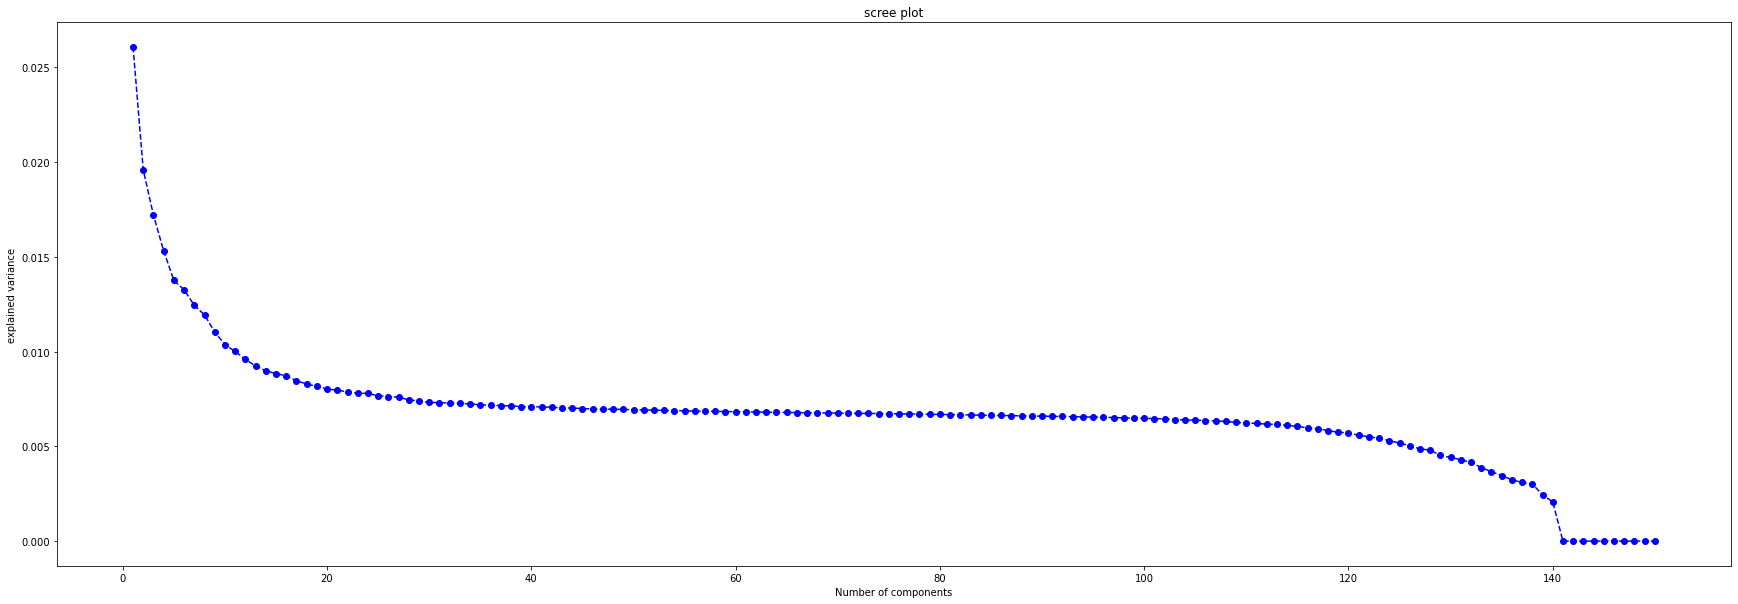

In [71]:
# The scree plot of the Principal components
n_comp=np.arange(pca.n_components_)+1
plt.figure(figsize=(30,10))
plt.plot(n_comp,pca.explained_variance_ratio_,'--o', color='blue')
plt.xlabel('Number of components')
plt.ylabel('explained variance')
plt.title('scree plot')

In [72]:
# The variance ratio
pca=PCA(n_components=140)
data_pca= pca.fit_transform(features_data)
print(pca.explained_variance_ratio_) 

[0.02606633 0.01957619 0.01718688 0.01530613 0.01374818 0.01325673
 0.01243638 0.01192556 0.01103049 0.01036108 0.01000178 0.00958619
 0.0092394  0.00898461 0.008834   0.00872077 0.00845508 0.0082871
 0.0081572  0.00801924 0.00796233 0.00786958 0.00780547 0.00778595
 0.00766281 0.00762084 0.00758967 0.00745135 0.00738693 0.00731209
 0.00730164 0.00728382 0.00726387 0.00723982 0.00718107 0.00717551
 0.00714613 0.00713331 0.00709422 0.00708775 0.00707675 0.00706045
 0.00702337 0.00701923 0.0069891  0.00696901 0.00696415 0.00695578
 0.00694555 0.00693135 0.00691612 0.00690843 0.00689042 0.00688269
 0.00686786 0.0068472  0.0068429  0.00684218 0.00683316 0.00682608
 0.00680965 0.00680235 0.00679902 0.00678873 0.00678562 0.00677792
 0.00676642 0.00676366 0.00675683 0.00674866 0.00674107 0.0067384
 0.00673257 0.00672886 0.00672052 0.00671162 0.00670425 0.00669588
 0.00668795 0.00667855 0.00667605 0.00666571 0.00665383 0.00663867
 0.00663337 0.00662618 0.00661556 0.00660303 0.00659705 0.006590

In [73]:

import math
import numpy as np
math.fsum(pca.explained_variance_ratio_)
#np.sum(pca.explained_variance_ratio_)

1.0

In [74]:

data_pca_fit_tran=pd.DataFrame(data_pca)
data_pca_fit_tran

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139
0,1.079952,-0.961883,0.813113,-1.024870,-1.037017,1.149221,0.490388,-0.332457,-1.210322,0.147339,0.637678,-0.036073,0.204128,-0.391319,-0.488134,0.257182,1.025805,0.783556,-1.267813,0.383126,-0.844123,0.323327,-1.015964,0.184302,-0.866234,-0.363682,0.574028,-0.503987,-0.152054,0.316412,-1.243521,0.040961,-1.063633,0.708796,-0.187372,0.236849,0.161071,-0.377597,-0.292190,0.677998,0.356554,0.468109,-0.006157,-0.858573,-0.498551,-0.216536,-0.091846,0.767114,0.327261,0.194678,0.109440,-0.127951,0.421692,0.005466,0.642283,0.226185,-0.515549,-1.249977,-1.046763,-0.422819,1.632705,0.871546,-0.552331,-0.735290,0.768897,-1.135146,-0.864947,3.781264,0.350366,0.222063,-1.837494,1.581299,2.845974,-1.070907,1.391186,-0.020862,0.873238,2.375402,-3.156234,1.116460,0.701681,2.063396,-0.840411,1.393530,-0.705931,-1.976939,0.534683,2.350053,-0.283994,-1.198430,-0.497233,-0.211924,0.296264,-0.651076,-0.786360,-1.155486,0.484735,0.393948,-0.503921,-0.106025,-0.375438,-0.543020,-1.131416,-0.746896,-0.635189,-0.122320,-0.903540,-1.078221,-0.539580,-0.119741,-0.202080,-0.067536,-0.265364,0.543582,1.221335,0.299008,0.958879,-0.634822,-0.194201,0.052265,-0.288909,-0.076807,-0.418110,0.287277,0.929334,0.766030,-0.128995,-1.204456,0.121788,-1.292137,0.042878,0.590058,-0.054108,0.797091,-0.064799,0.090463,-0.294726,-0.469506,0.745282,0.635808
1,3.898116,2.282297,-1.501765,1.313003,0.586268,-0.525887,-1.182501,-1.223649,2.065747,0.212254,-1.279482,-0.202766,0.035233,0.777296,0.012207,2.174026,1.677484,2.133510,-0.564274,-0.133403,-1.256060,0.055156,1.242028,0.287119,-0.403406,-0.131776,0.256361,-0.852941,-0.639961,-0.686387,-0.807279,-0.265387,-1.824324,1.080156,0.097633,-0.605116,-1.189618,-0.869340,0.299760,0.487283,0.785772,0.295876,-0.434236,-1.900691,-0.080298,0.524679,0.665088,0.513598,-0.254354,0.129615,0.099247,0.068916,0.194577,-0.027573,0.218048,0.682752,-0.041841,-0.804344,-0.748760,-1.635833,1.238585,1.076021,-0.566732,-0.972904,1.152212,-1.354693,-0.703616,4.522882,0.163533,-0.178083,-1.583910,1.609453,2.062757,-0.859617,1.886798,-0.109432,0.751232,2.016020,-2.799998,0.831298,0.855772,1.722110,-0.766193,1.544312,-0.450468,-1.942617,0.210756,1.706861,-1.068308,-0.280442,-0.110272,0.479840,0.562088,-0.518423,-0.626335,-1.016437,0.067922,0.620171,-1.272778,-0.326690,-0.497453,-0.534857,-0.677720,-0.451667,-0.966314,0.518127,-0.934666,-1.158875,-0.397375,-0.059607,0.220106,-0.069048,0.258823,0.159279,0.368698,-0.209516,0.328282,-0.706788,0.399397,-0.051325,0.027723,-0.311288,-0.621209,0.617471,-0.350913,-0.072259,0.081375,-0.134681,0.154090,-0.148468,-0.292080,-0.130258,0.200228,-0.425260,0.175444,-0.052733,-0.385449,0.666440,0.554660,0.015696
2,2.783839,3.335896,-2.077514,1.114057,-0.099244,0.150085,-0.702828,-0.183490,0.889429,-0.045059,-0.598022,-0.791073,-0.209239,1.111167,-0.220009,0.301606,-2.128291,0.596329,-0.826922,0.119228,-0.381717,0.277625,1.408861,-0.127985,-0.213892,-1.238979,-0.967514,-0.273835,0.468194,0.105919,-0.237168,-0.585123,-0.863115,1.080337,-0.482667,0.071016,-0.016582,-0.051184,-0.601569,0.370095,0.646068,0.167427,0.115434,-0.967108,-0.393287,-0.239041,-0.480760,0.588881,0.387720,0.336093,-0.144662,-0.062895,0.565150,-0.095501,0.000511,0.388572,-0.670073,-1.241502,-1.003427,-0.741199,1.640750,0.741910,-0.503626,-0.885373,0.792173,-1.162266,-0.607577,3.832325,0.308095,0.369606,-1.708600,1.394836,2.779459,-1.068999,1.473459,0.148648,0.931368,1.882549,-3.136363,1.084415,0.986835,1.978771,-0.530390,1.517340,-0.183352,-1.872785,0.683701,1.982649,-0.143073,-0.737685,-0.180674,0.104292

In [75]:

# Assiging the default columns to PC:
columns=[]
for i in data_pca_fit_tran.columns:
  columns.append('PC'+ str(i))
data_pca_fit_tran =pd.DataFrame(data_pca, columns=columns)
data_pca_fit_tran

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,PC51,PC52,PC53,PC54,PC55,PC56,PC57,PC58,PC59,PC60,PC61,PC62,PC63,PC64,PC65,PC66,PC67,PC68,PC69,PC70,PC71,PC72,PC73,PC74,PC75,PC76,PC77,PC78,PC79,PC80,PC81,PC82,PC83,PC84,PC85,PC86,PC87,PC88,PC89,PC90,PC91,PC92,PC93,PC94,PC95,PC96,PC97,PC98,PC99,PC100,PC101,PC102,PC103,PC104,PC105,PC106,PC107,PC108,PC109,PC110,PC111,PC112,PC113,PC114,PC115,PC116,PC117,PC118,PC119,PC120,PC121,PC122,PC123,PC124,PC125,PC126,PC127,PC128,PC129,PC130,PC131,PC132,PC133,PC134,PC135,PC136,PC137,PC138,PC139
0,1.079952,-0.961883,0.813113,-1.024870,-1.037017,1.149221,0.490388,-0.332457,-1.210322,0.147339,0.637678,-0.036073,0.204128,-0.391319,-0.488134,0.257182,1.025805,0.783556,-1.267813,0.383126,-0.844123,0.323327,-1.015964,0.184302,-0.866234,-0.363682,0.574028,-0.503987,-0.152054,0.316412,-1.243521,0.040961,-1.063633,0.708796,-0.187372,0.236849,0.161071,-0.377597,-0.292190,0.677998,0.356554,0.468109,-0.006157,-0.858573,-0.498551,-0.216536,-0.091846,0.767114,0.327261,0.194678,0.109440,-0.127951,0.421692,0.005466,0.642283,0.226185,-0.515549,-1.249977,-1.046763,-0.422819,1.632705,0.871546,-0.552331,-0.735290,0.768897,-1.135146,-0.864947,3.781264,0.350366,0.222063,-1.837494,1.581299,2.845974,-1.070907,1.391186,-0.020862,0.873238,2.375402,-3.156234,1.116460,0.701681,2.063396,-0.840411,1.393530,-0.705931,-1.976939,0.534683,2.350053,-0.283994,-1.198430,-0.497233,-0.211924,0.296264,-0.651076,-0.786360,-1.155486,0.484735,0.393948,-0.503921,-0.106025,-0.375438,-0.543020,-1.131416,-0.746896,-0.635189,-0.122320,-0.903540,-1.078221,-0.539580,-0.119741,-0.202080,-0.067536,-0.265364,0.543582,1.221335,0.299008,0.958879,-0.634822,-0.194201,0.052265,-0.288909,-0.076807,-0.418110,0.287277,0.929334,0.766030,-0.128995,-1.204456,0.121788,-1.292137,0.042878,0.590058,-0.054108,0.797091,-0.064799,0.090463,-0.294726,-0.469506,0.745282,0.635808
1,3.898116,2.282297,-1.501765,1.313003,0.586268,-0.525887,-1.182501,-1.223649,2.065747,0.212254,-1.279482,-0.202766,0.035233,0.777296,0.012207,2.174026,1.677484,2.133510,-0.564274,-0.133403,-1.256060,0.055156,1.242028,0.287119,-0.403406,-0.131776,0.256361,-0.852941,-0.639961,-0.686387,-0.807279,-0.265387,-1.824324,1.080156,0.097633,-0.605116,-1.189618,-0.869340,0.299760,0.487283,0.785772,0.295876,-0.434236,-1.900691,-0.080298,0.524679,0.665088,0.513598,-0.254354,0.129615,0.099247,0.068916,0.194577,-0.027573,0.218048,0.682752,-0.041841,-0.804344,-0.748760,-1.635833,1.238585,1.076021,-0.566732,-0.972904,1.152212,-1.354693,-0.703616,4.522882,0.163533,-0.178083,-1.583910,1.609453,2.062757,-0.859617,1.886798,-0.109432,0.751232,2.016020,-2.799998,0.831298,0.855772,1.722110,-0.766193,1.544312,-0.450468,-1.942617,0.210756,1.706861,-1.068308,-0.280442,-0.110272,0.479840,0.562088,-0.518423,-0.626335,-1.016437,0.067922,0.620171,-1.272778,-0.326690,-0.497453,-0.534857,-0.677720,-0.451667,-0.966314,0.518127,-0.934666,-1.158875,-0.397375,-0.059607,0.220106,-0.069048,0.258823,0.159279,0.368698,-0.209516,0.328282,-0.706788,0.399397,-0.051325,0.027723,-0.311288,-0.621209,0.617471,-0.350913,-0.072259,0.081375,-0.134681,0.154090,-0.148468,-0.292080,-0.130258,0.200228,-0.425260,0.175444,-0.052733,-0.385449,0.666440,0.554660,0.015696
2,2.783839,3.335896,-2.077514,1.114057,-0.099244,0.150085,-0.702828,-0.183490,0.889429,-0.045059,-0.598022,-0.791073,-0.209239,1.111167,-0.220009,0.301606,-2.128291,0.596329,-0.826922,0.119228,-0.381717,0.277625,1.408861,-0.127985,-0.213892,-1.238979,-0.967514,-0.273835,0.468194,0.105919,-0.237168,-0.585123,-0.863115,1.080337,-0.482667,0.071016,-0.016582,-0.051184,-0.601569,0.370095,0.646068,0.167427,0.115434,-0.967108,-0.393287,-0.239041,-0.480760,0.588881,0.387720,0.336093,-0.144662,-0.062895,0.565150,-0.095501,0.000511,0.388572,-0.670073,-1.241502,-1.003427,-0.741199,1.640750,0.741910,-0

In [79]:

# LabelEncoder to the categorical datasets
for i in c_data.columns:
    le = LabelEncoder()
    c_data[i]=le.fit_transform(c_data[i])
    c_data_le=c_data
c_data_le

,manufacturer,condition,cylinders,fuel,title_status,transmission,drive,type,paint_color,state
31,13,0,5,2,0,0,2,10,0,1
32,14,2,6,2,0,2,0,8,0,1
33,7,2,5,2,0,2,0,8,9,1
34,38,0,5,2,0,0,0,10,5,1
35,7,2,5,2,0,2,0,8,8,1
...,...,...,...,...,...,...,...,...,...,...
426859,6,2,5,2,0,2,1,7,0,50
426860,18,2,6,2,0,0,0,7,0,50
426866,18,2,6,2,0,0,2,7,0,50
426874,23,2,5,2,0,0,2,9,10,50


In [80]:

# DataFrame after concate the standarized numerical dataframe to the Labelencoded data
X_data_le=pd.concat([n_data,c_data_le], axis=1)
X_data_le

,price,year,odometer,manufacturer,condition,cylinders,fuel,title_status,transmission,drive,type,paint_color,state
31,15000,2013.0,128000.0,13,0,5,2,0,0,2,10,0,1
32,27990,2012.0,68696.0,14,2,6,2,0,2,0,8,0,1
33,34590,2016.0,29499.0,7,2,5,2,0,2,0,8,9,1
34,35000,2019.0,43000.0,38,0,5,2,0,0,0,10,5,1
35,29990,2016.0,17302.0,7,2,5,2,0,2,0,8,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
426859,48590,2020.0,7701.0,6,2,5,2,0,2,1,7,0,50
426860,39990,2017.0,41664.0,18,2,6,2,0,0,0,7,0,50
426866,32990,2016.0,55612.0,18,2,6,2,0,0,2,7,0,50
426874,33590,2018.0,30814.0,23,2,5,2,0,0,2,9,10,50


In [81]:
# Apply a standarization technique for the labelencoded datasets
scaler_le=StandardScaler()
num_data_scaled_le=scaler_le.fit_transform(X_data_le)
num_sclaed_df_le=pd.DataFrame(num_data_scaled_le,index=X_data_le.index, columns=X_data_le.columns)
num_sclaed_df_le

,price,year,odometer,manufacturer,condition,cylinders,fuel,title_status,transmission,drive,type,paint_color,state
31,-0.003949,0.369468,0.357588,-0.497777,-1.019708,0.299268,0.120758,-0.222951,-0.427350,1.528565,0.970487,-1.404686,-1.530944
32,-0.002839,0.256683,-0.647929,-0.407917,0.718885,1.082612,0.120758,-0.222951,2.742405,-1.022614,0.479662,-1.404686,-1.530944
33,-0.002276,0.707823,-1.312526,-1.036932,0.718885,0.299268,0.120758,-0.222951,2.742405,-1.022614,0.479662,0.839840,-1.530944
34,-0.002241,1.046178,-1.083613,1.748703,-1.019708,0.299268,0.120758,-0.222951,-0.427350,-1.022614,0.970487,-0.157727,-1.530944
35,-0.002669,0.707823,-1.519330,-1.036932,0.718885,0.299268,0.120758,-0.222951,2.742405,-1.022614,0.479662,0.590448,-1.530944
...,...,...,...,...,...,...,...,...,...,...,...,...,...
426859,-0.001079,1.158963,-1.682118,-1.126791,0.718885,0.299268,0.120758,-0.222951,2.742405,0.252975,0.234249,-1.404686,1.767995
426860,-0.001814,0.820608,-1.106265,-0.048481,0.718885,1.082612,0.120758,-0.222951,-0.427350,-1.022614,0.234249,-1.404686,1.767995
426866,-0.002412,0.707823,-0.869773,-0.048481,0.718885,1.082612,0.120758,-0.222951,-0.427350,1.528565,0.234249,-1.404686,1.767995
426874,-0.002361,0.933393,-1.290230,0.400815,0.718885,0.299268,0.120758,-0.222951,-0.427350,1.528565,0.725074,1.089232,1.767995


In [82]:

# split the dummies data after PCA applied
#X=data_pca_fit_tran
#y=label_data

# splitt the data set after labelencoder applied
#I do not applied a pca in the labelencoded dataset, since I do have only 13 features
X =num_sclaed_df_le.drop('price',axis=1)
y=num_sclaed_df_le['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [83]:
# computing the baseline
baseline_train = np.ones(shape = y_train.shape)*y_train.mean()
baseline_test = np.ones(shape = y_test.shape)*y_test.mean()
mse_baseline_train = mean_squared_error(baseline_train, y_train)
mse_baseline_test = mean_squared_error(baseline_test, y_test)
     

In [84]:

print(baseline_train.shape, baseline_test.shape)
print(f'Baseline for training data: {mse_baseline_train}')
print(f'Baseline for testing data: {mse_baseline_test}')

(77849,) (33365,)
Baseline for training data: 1.428575694760455
Baseline for testing data: 2.099756126855142e-06


# Polynomial features

In [85]:

train_mses=[]
test_mses=[]
for i in range(1,5):
  poly_pipe=Pipeline(
               steps=[('poly_feaures',PolynomialFeatures(degree=i,include_bias=False)),
                      ('lr_model',LinearRegression())
                                               ] 

                                               )
  poly_pipe.fit(X_train,y_train)
  train_poly_preds=poly_pipe.predict(X_train)
  test_poly_preds=poly_pipe.predict(X_test)
  train_mses.append(mean_squared_error(y_train,train_poly_preds))
  test_mses.append(mean_squared_error(y_test,test_poly_preds))

In [86]:
# select the Best polynomial features:
print(train_mses.index(min(train_mses)))
print(test_mses.index(min(test_mses)))

3
0



# Apply SequentailFeature Selection

In [87]:
seq_pipe=Pipeline(
              steps=[('poly_features',PolynomialFeatures(degree=3,include_bias=False)),
                     ('Seq_selector', SequentialFeatureSelector(estimator=Lasso(),direction='forward',cv=5)),
                     ('lr_model',LinearRegression())]

)

In [ ]:

# apply the gridsearch on the sequential feature selection
param_dict = {'Seq_selector__n_features_to_select': [2, 3, 4, 5]}  
seq_grid=GridSearchCV(estimator=seq_pipe,param_grid=param_dict)
seq_grid.fit(X_train,y_train)
train_seq_pred=seq_grid.predict(X_train)
test_seq_pred=seq_grid.predict(X_test)
     

In [ ]:

#Calculate the mean squared error
train_mse_seq=mean_squared_error(y_train,train_seq_pred)
test_mse_seq=mean_squared_error(y_test,test_seq_pred)

print(f'train mean squared erro: {train_mse_seq}')
print(f'test mean squared erro: {test_mse_seq}')

In [ ]:

best_estimator = seq_grid.best_estimator_
best_selector = best_estimator.named_steps['Seq_selector']
best_model = seq_grid.best_estimator_.named_steps['lr_model']
coefs = best_model.coef_

print(f'the bset estimator is :{best_estimator}')
print('\n')
print(f'the bset selector is :{best_selector}')
print('\n')
print(f'the bset model is :{best_model}')
print('\n')

In [ ]:

r = permutation_importance(seq_grid, X_test, y_test,n_repeats=1,random_state=0)
for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        print(f"{num_sclaed_df_le.columns[i]:<8}"
              f"{r.importances_mean[i]:.3f}"
              f" +/- {r.importances_std[i]:.3f}")

# Ridge Model

In [ ]:

# Applying the ridge model for feature selection
ridge_pipe=Pipeline(
               steps=[('poly_feaures',PolynomialFeatures(degree=3,include_bias=False)),
                     ('ridge_model',Ridge())
                                          ] 

                                        )

In [ ]:

#Calculate the mean squared error
train_mse_ridge=mean_squared_error(y_train,train_grid_ridge_pred)
test_mse_ridge=mean_squared_error(y_test,test_grid_ridge_pred)

print(f'train mean squared erro: {train_mse_ridge}')
print(f'test mean squared erro: {test_mse_ridge}')

In [ ]:

best_estimator = ridge_grid.best_estimator_
best_model = ridge_grid.best_estimator_.named_steps['ridge_model']
coefs = best_model.coef_

print(f'the bset estimator is :{best_estimator}')
print('\n')
print(f'the bset model is :{best_model}')
print('\n')
#print(f'the coefficients :{coefs}')

In [ ]:
X_tt=X_data_le.drop('price', axis=1)
y_tt=X_data_le['price']
     

# Transformed TargetRegressor

In [ ]:
#Using MinMaxScaler
# prepare the model with input scaling
ridge_tte_pipe=Pipeline(
               steps=[('poly_feaures',PolynomialFeatures(degree=3,include_bias=False)),
                      ('ridge_model',Ridge())
                                          ] 

                                        )

model_minmax = TransformedTargetRegressor(regressor=ridge_tte_pipe, transformer=MinMaxScaler())
model_minmax.fit(X_train,y_train)
tte_train_pred_minmax=model_minmax.predict(X_train)
tte_test_pred_minmax=model_minmax.predict(X_test)
tte_train_mses_minmax=mean_squared_error(y_train,tte_train_pred_minmax)
tte_test_mses_minmax=mean_squared_error(y_test,tte_test_pred_minmax)
print(f'train mean squared erro for TransformedTargetRegressor: {tte_train_mses_minmax}')
print(f'test mean squared erro for TransformedTargetRegressor: {tte_test_mses_minmax}')

In [ ]:
# Dataframe all models 
pd.DataFrame({'baseline model':[mse_baseline_train,mse_baseline_test],
              'SeqFSel model':[train_mse_seq,test_mse_seq],
              'Ridge model':[train_mse_ridge,test_mse_ridge],
              'TransformedTargetRegressor':[tte_train_mses_minmax,tte_test_mses_minmax]}, index=['train_error','test_error']